In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from NewsSentiment import TargetSentimentClassifier
from scipy.signal import savgol_filter


In [19]:
cur_color = "#06cc1d"
dis_color = "#399944"

# Equiring the Data

## 1. News API

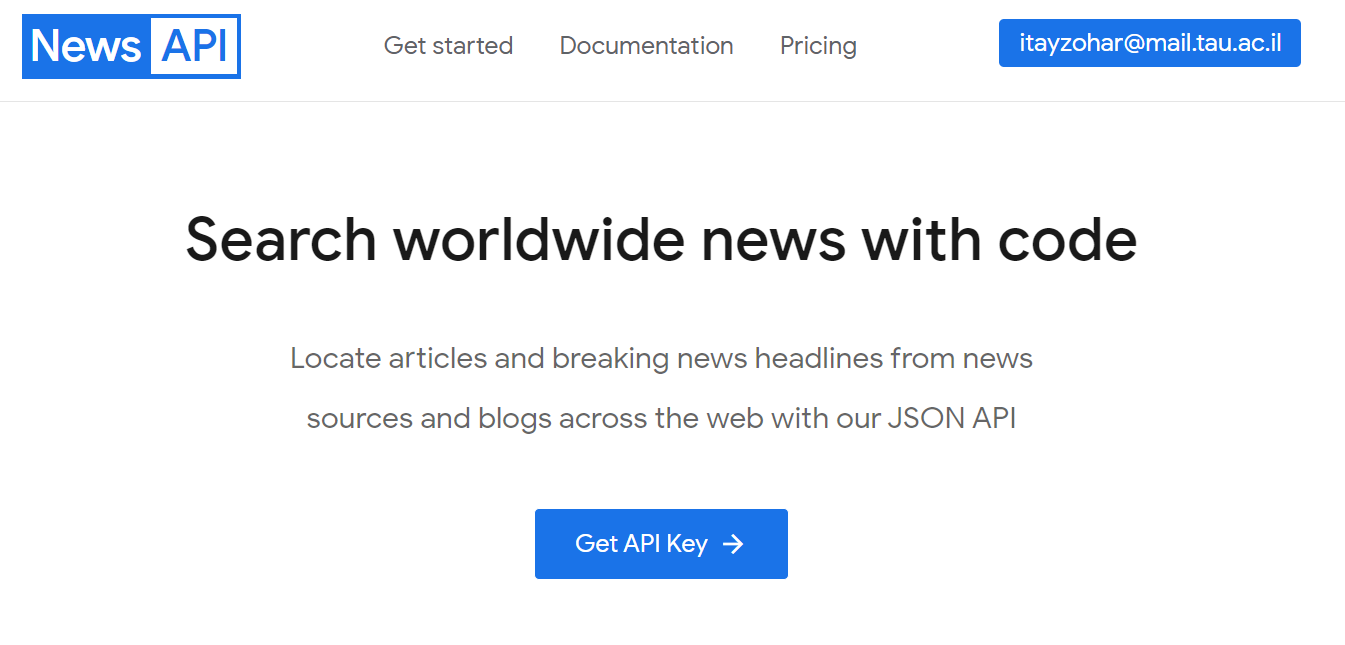


### only one month of data for the free:
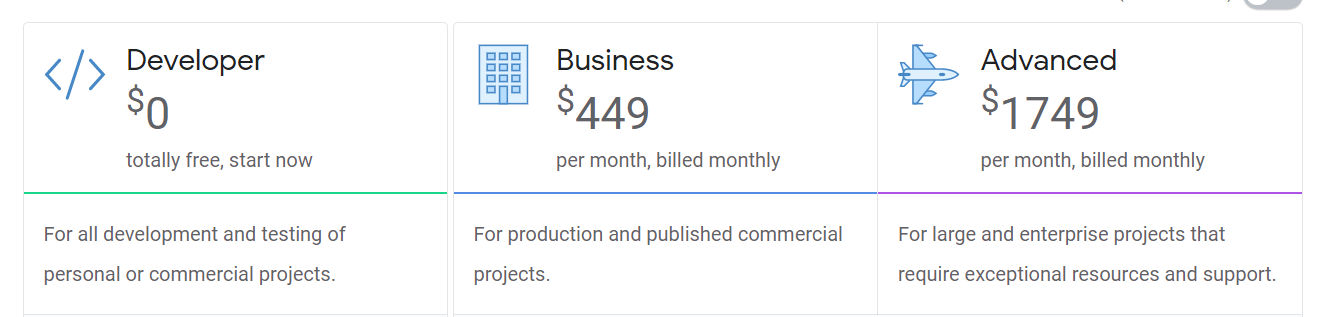

### might be too slow
**request requires pagination:**  
  
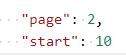

  
**and then requires scraping for every article indepenetly**
  
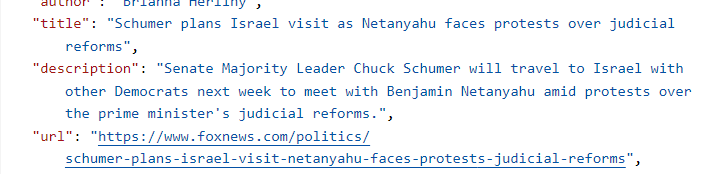

## 2. Implement ourself

## meet our `Scraper`

**class for for every source we need:**
  
 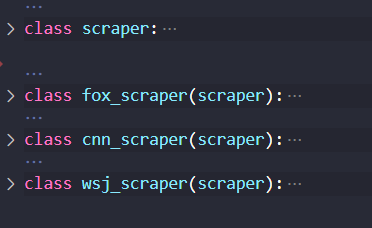

**that uses the source internal API:**  
  
 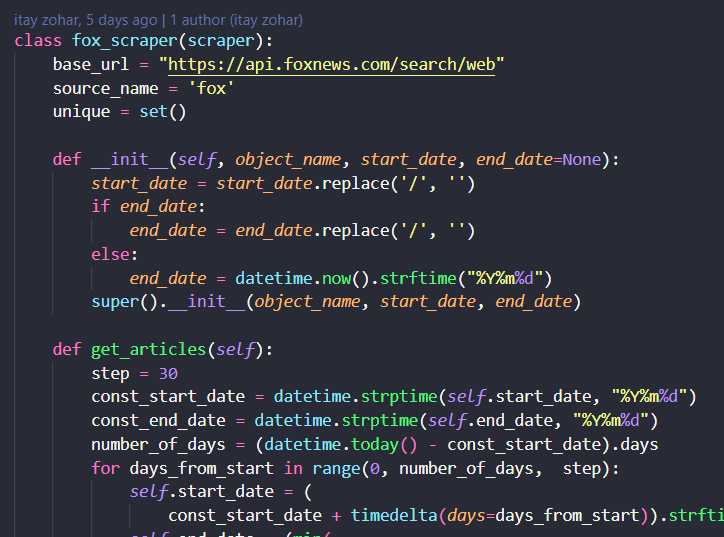

## scraping at scale: `CNN`
  
  **cnn returns the entire content of every article in history! (actually, about 3 years of data)**  
  
  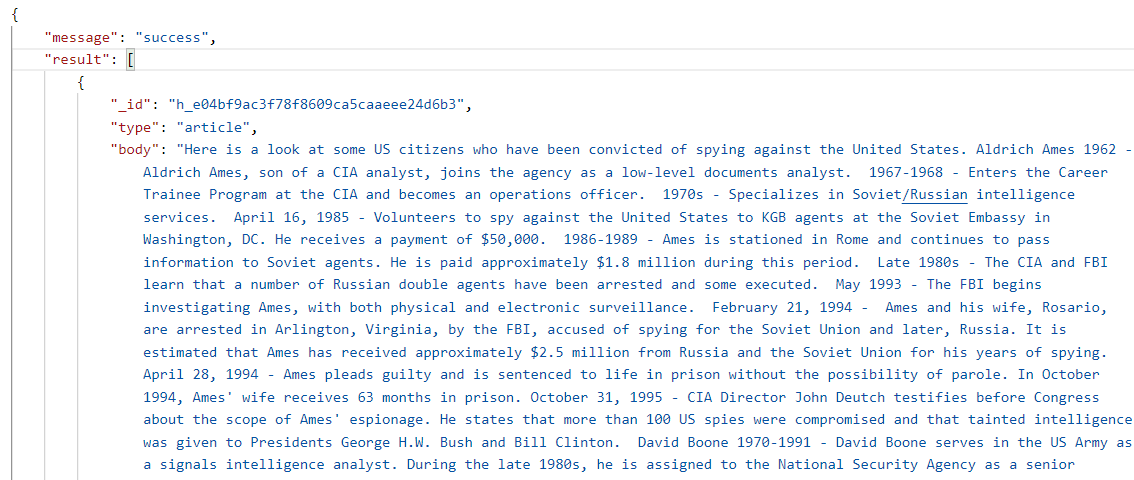

  
 **articles about netanyhu**:  
   
 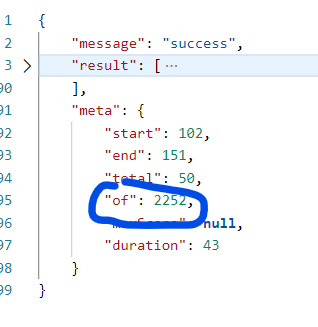
  
  
    
 **saved to csv in 20 secnods**


## Handling with bugs: `FOX`

**if page number is larger then 100, it explodes ! what can we do?**  
  
*query one month at a time and hope there's less then 100 articles in a signle month*  
*which wasn't fun*  
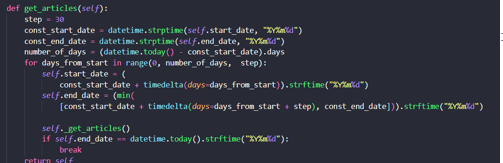

# NLTK model

### 

# ABSA - Aspect Based Santiment Analysis
Also called *traget based* santiment analysis

In [20]:
tsc = TargetSentimentClassifier()


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [21]:
get_label = lambda res: max(res, key=lambda class_pred: class_pred['class_prob'])['class_label']
res = tsc.infer_from_text("I don't like ", "trump", ", he is a bad person")
get_label(res)

'negative'

In [22]:
res = tsc.infer_from_text("I like biden bery much. but ", "trump", ", is a bad person")
get_label(res)

'negative'

In [23]:
res = tsc.infer_from_text("I hate biden bery much. but ", "trump", ", is simply the best")
get_label(res)

'positive'

In [24]:
res

[{'class_id': 2, 'class_label': 'positive', 'class_prob': 0.8813924193382263},
 {'class_id': 0, 'class_label': 'negative', 'class_prob': 0.07329294085502625},
 {'class_id': 1, 'class_label': 'neutral', 'class_prob': 0.04531463608145714}]

# Co-refrence

In [25]:
coref = pd.read_csv('../data/preprocessed_data/cnn_netanyahu_coref.csv')
no_coref = pd.read_csv('../data/cnn-articles-netanyahu.csv')

In [26]:
coref.occurences = coref.text.apply(lambda x: x.lower().count('netanyahu'))
no_coref.occurences = no_coref.text.apply(lambda x: x.lower().count('netanyahu'))
pass

/tmp/ipykernel_3607/2623089929.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  coref.occurences = coref.text.apply(lambda x: x.lower().count('netanyahu'))
/tmp/ipykernel_3607/2623089929.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  no_coref.occurences = no_coref.text.apply(lambda x: x.lower().count('netanyahu'))


In [27]:
print(no_coref.occurences.value_counts().shape)
no_coref.occurences.value_counts()

(25,)


1     73
2     31
3     28
4     24
6     14
5     10
9      8
8      7
14     6
10     5
13     5
12     5
7      4
18     4
17     2
22     2
26     2
11     2
15     2
20     1
31     1
16     1
36     1
35     1
32     1
Name: text, dtype: int64

In [28]:
print(coref.occurences.value_counts().shape)
coref.occurences.value_counts()

(58,)


1      42
3      24
2      24
5      10
8      10
6      10
13      7
4       7
9       6
7       6
18      6
17      5
10      5
23      4
31      4
21      4
12      4
20      3
32      3
25      3
27      2
35      2
29      2
22      2
100     2
24      2
11      2
49      2
41      2
59      2
44      1
85      1
56      1
80      1
72      1
61      1
14      1
19      1
40      1
76      1
15      1
36      1
81      1
48      1
37      1
68      1
43      1
34      1
33      1
52      1
73      1
16      1
39      1
53      1
30      1
217     1
28      1
63      1
Name: text, dtype: int64

In [29]:
coref[coref.occurences > 50][coref.title.str.startswith('Biden, staring down first Mideast crisi')]

/tmp/ipykernel_3607/421614885.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  coref[coref.occurences > 50][coref.title.str.startswith('Biden, staring down first Mideast crisi')]


,Unnamed: 0,url,source,title,text,timestamp
142,142,https://www.cnn.com/2021/05/20/politics/joe-bi...,cnn,"Biden, staring down first Mideast crisis, tout...",netanyahu netanyahu netanyahu netanyahu touted...,2021-05-20


In [30]:
text = coref[coref.occurences > 50][coref.title.str.startswith('Biden, staring down first Mideast crisi')].text.values[0]

/tmp/ipykernel_3607/2325712185.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  text = coref[coref.occurences > 50][coref.title.str.startswith('Biden, staring down first Mideast crisi')].text.values[0]


In [31]:
text[0:55]

'netanyahu netanyahu netanyahu netanyahu touted Thursday'

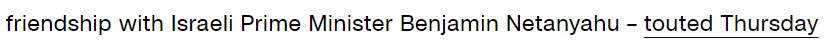

In [32]:
loc = text.find("netanyahu credited netanyahu")
text[loc-30:loc+60]

'truce was due to take effect, netanyahu credited netanyahu administration\'s own "quiet and'

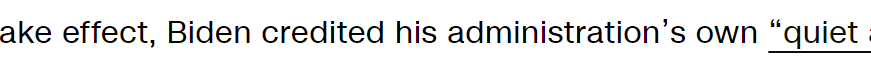

In [33]:
# tsc = TargetSentimentClassifier()
# tsc.infer_from_text("i hate trump", "trump")

# In-article normalization

In [34]:
cnn = pd.read_csv('../data/output_data/netanyahu_cnn_news_sentiment_not_norm.csv')
fox = pd.read_csv('../data/output_data/netanyahu_fox_news_sentiment_not_norm.csv')


In [35]:
worst_precentile = cnn.compound_s.quantile(0.1)
best_precentile = cnn.compound_s.quantile(0.9)
print("worst_precentile (10%): ", worst_precentile, ". best_precentile (10%): ", best_precentile)

best_precentile = cnn.compound_s.quantile(0.95)
print("best_precentile (5%): ", best_precentile)

cnn[cnn.compound_s < worst_precentile].loc[:, ('title', 'compound_s')].values

worst_precentile (10%):  -0.9999355623692286 . best_precentile (10%):  0.5525246255121826
best_precentile (5%):  0.9353988630391642


array([["Opinion: Mitt Romney's moments of truth", -1.0],
       ['Israel targets Gaza with airstrikes after intercepting rocket attack',
        -1.0],
       ['Jacinda Ardern, like George Washington, knew when to quit',
        -0.9999956871917902],
       ['Biden tries to ease worries over US commitment to the Middle East in meetings with key leaders',
        -0.9999979156019558],
       ['Saudi Arabia opens airspace to Israeli flights',
        -0.9999979156019558],
       ['Israeli and Palestinian leaders speak by phone for the first time in years',
        -1.0],
       ['5 things to know for June 21: Gas prices, Ukraine, January 6, Israel, Covid-19',
        -0.9999922828773666],
       ['Israel and the West Bank are on edge again. Here are five things you need to know',
        -0.9999999974859916],
       ['Israeli officials deny report that police are using cellphone spying software on citizens without court approval',
        -0.999999999999998],
       ['Israel doubles dow

In [36]:
cnn[cnn.compound_s > best_precentile].loc[:, ('title', 'compound_s')].values

array([['11 Palestinians killed during Israeli raid targeting militants in West Bank',
        0.9985939046633222],
       ["Opinion: What Europe makes of America's election result",
        0.9994010644617802],
       ['July 9, 2022 Shinzo Abe assassination news', 0.9999999602501988],
       ['July 8, 2022 Shinzo Abe shot dead in Nara, Japan',
        0.9999999602501988],
       ['Israel announces plan to double Golan Heights population, drawing condemnation from Syria',
        0.9993514270751204]], dtype=object)

### only one occurence
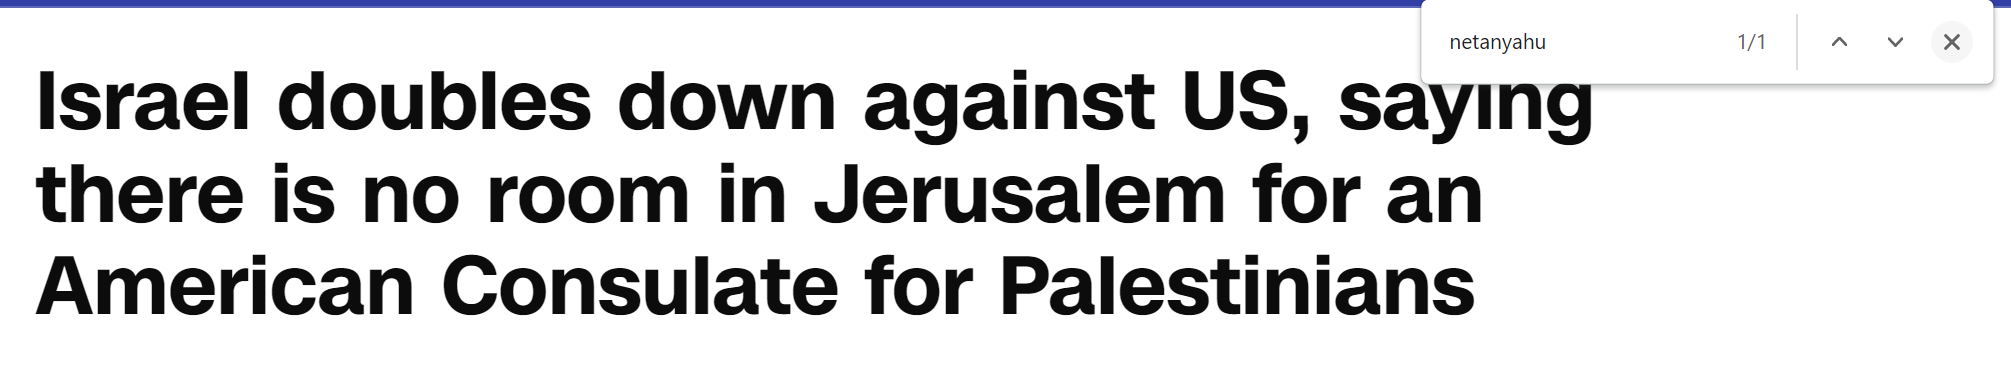

### colors the entire article as -1.0 negative (worst possible)
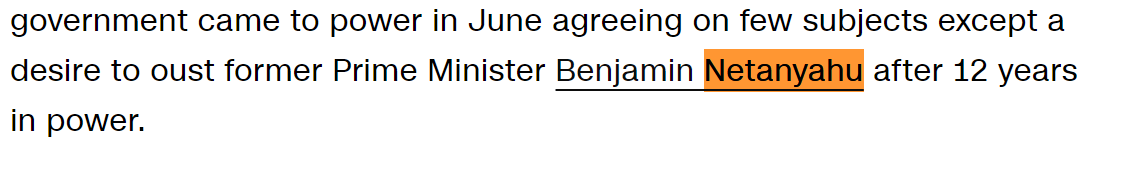

### low occurences penalty
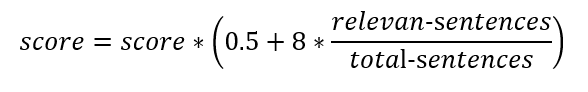

In [37]:
cnn = pd.read_csv('../data/output_data/netanyahu_cnn_news_sentiment.csv')
fox = pd.read_csv('../data/output_data/netanyahu_fox_news_sentiment.csv')


In [38]:
worst_precentile = cnn.compound_s.quantile(0.1)
best_precentile = cnn.compound_s.quantile(0.9)
print("worst_precentile (10%): ", worst_precentile, ". best_precentile (10%): ", best_precentile)

best_precentile = cnn.compound_s.quantile(0.95)
print("best_precentile (5%): ", best_precentile)

cnn[cnn.compound_s < worst_precentile].loc[:, ('title', 'compound_s')].values

worst_precentile (10%):  -0.8133121959478349 . best_precentile (10%):  0.5290328383681612
best_precentile (5%):  0.6911645036729865


array([['Israel targets Gaza with airstrikes after intercepting rocket attack',
        -1.0],
       ['A major oil exporter is hosting a UN climate summit. Opinions are divided',
        -0.8999349635766452],
       ['More than 80,000 people turn out for Tel Aviv protest against Netanyahu government',
        -0.9540841074848612],
       ['The world leaders who refuse to leave the stage',
        -0.9444444444444444],
       ["Israel's Prime Minister makes rare allusion to country's nuclear weapons arsenal",
        -0.9999999990541312],
       ['Saudi Arabia opens airspace to Israeli flights',
        -0.9444424758462916],
       ['Israeli and Palestinian leaders speak by phone for the first time in years',
        -1.0],
       ['A leader for all Israelis? Yair Lapid takes over as caretaker prime minister',
        -0.8917801697616614],
       ['Netanyahu negotiating possible corruption case plea deal to safeguard political career, sources say',
        -0.8638911902475801],
       

### Now it's way more clear
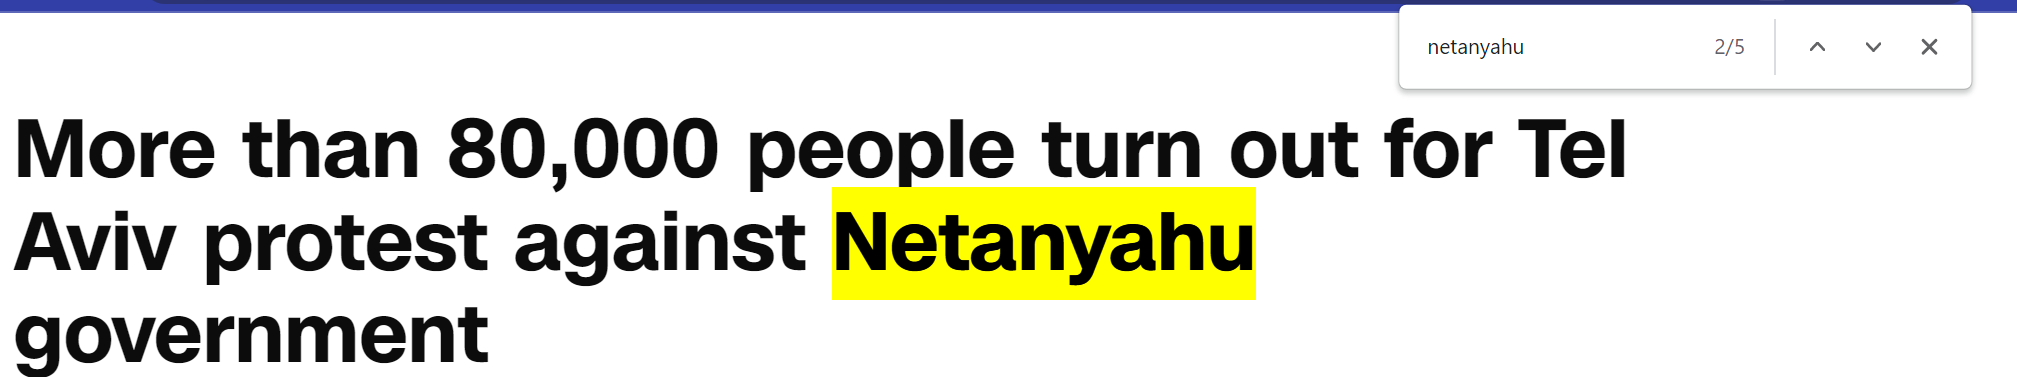

...

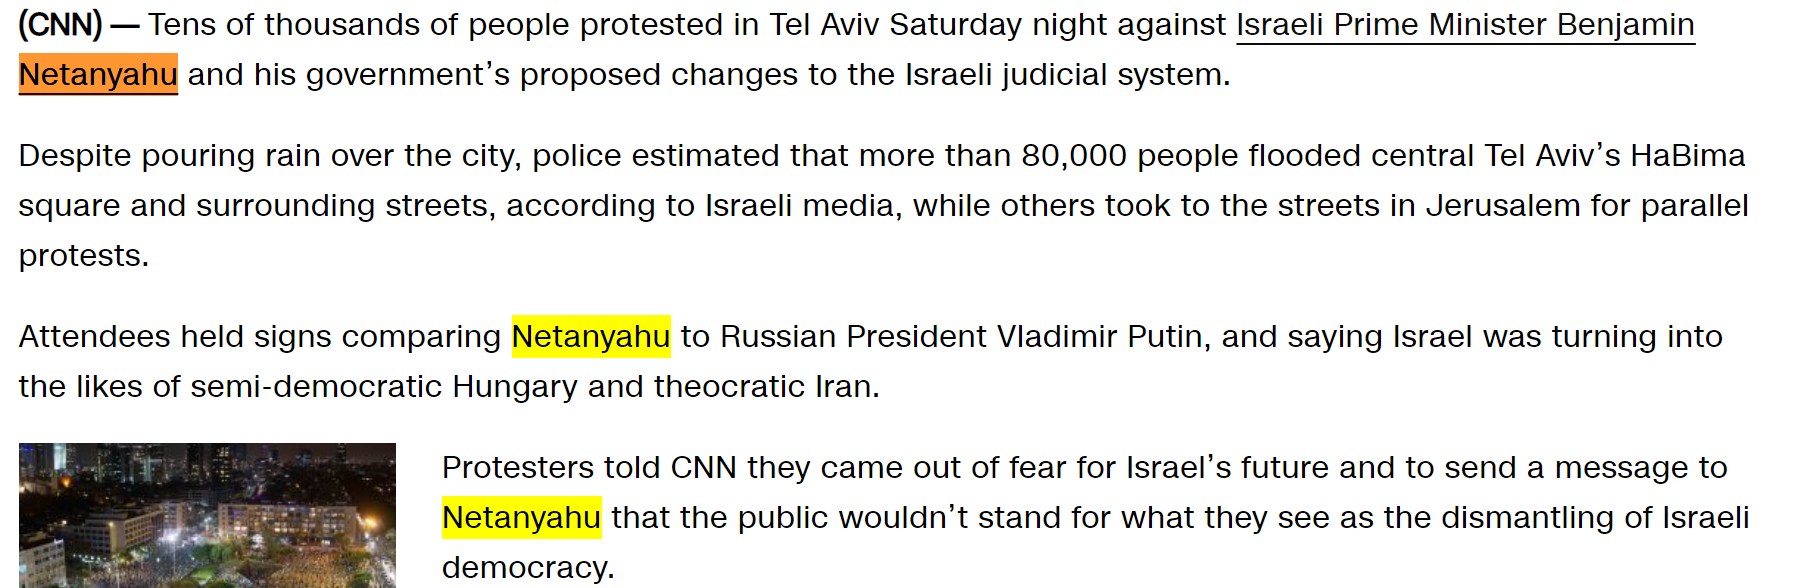

# Models

## "Industry Standart" Model results

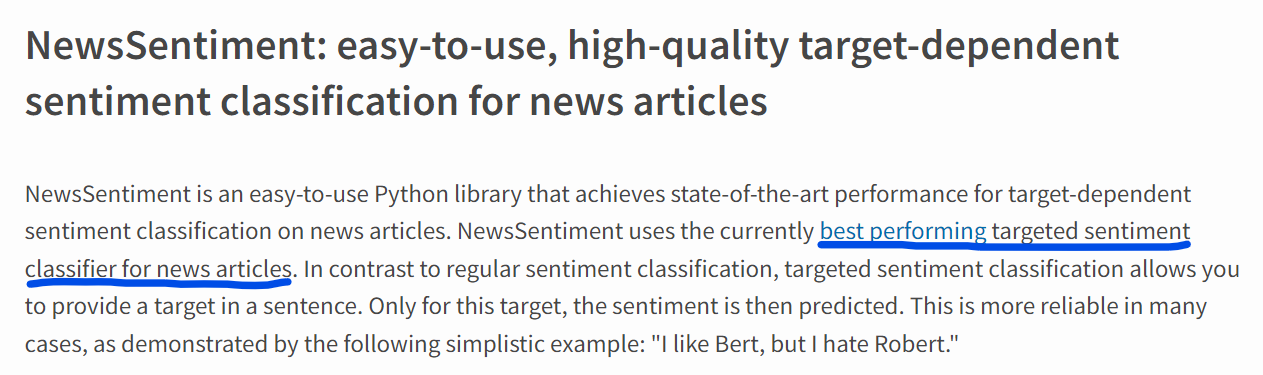

see [github repo](https://github.com/fhamborg/NewsMTSC) or [Hugging face page](https://huggingface.co/datasets/fhamborg/news_sentiment_newsmtsc)
  
and.. it's as easy as  
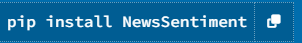

## 100 Netanyahu articles  

In [39]:
def add_data_to_plot(axes, vendor1, vendor2, mean1, mean2, correlation):
    axes.text(0.02, 0.95, f'Correlation: {round(correlation,4)}',
                           fontdict={'size': 15, 'color':cur_color}, transform=axes.transAxes)
                
    axes.text(0.02, 0.92, f'Mean {vendor2}: {round(mean1,4)},',
                fontdict={'size': 10, 'color':dis_color}, transform=axes.transAxes)
    axes.text(0.02, 0.89, f'Mean {vendor1}: {round(mean2,4)}',
                fontdict={'size': 10, 'color':dis_color}, transform=axes.transAxes)
    return axes

### raw data

In [17]:
def plot(df:pd.DataFrame, vendor, color='#4287f5'):
    df.date = pd.to_datetime(df.date)
    df = df.sort_values(by=['date'])
    axes = df.plot(x='date', y='compound_s', kind='line', title=f'{vendor} News Sentiment', figsize=(17,8), color=color)


def joined_plot(df1:pd.DataFrame, df2:pd.DataFrame, vendor1, vendor2, color1='#4287f5', color2='#f56342'):  
    df1.date = pd.to_datetime(df1.date)
    df2.date = pd.to_datetime(df2.date)
    df1 = df1.sort_values(by=['date']).rename(columns={'compound_s': vendor1})
    df2 = df2.sort_values(by=['date']).rename(columns={'compound_s': vendor2})
    mean1 = df1[vendor1].mean()
    mean2 = df2[vendor2].mean()
    correlation = df1[vendor1].corr(df2[vendor2])
    axes = df1.plot(x='date', y=vendor1, kind='line', title=f'{vendor1} and {vendor2} News Sentiment', color=color1 , figsize=(17,8))
    add_data_to_plot(axes, vendor1, vendor2, mean1, mean2, correlation)
    df2.plot(x='date', y=vendor2, kind='line', ax=axes, color=color2)
    df3 = pd.DataFrame({'date': df1.date, 'baseline': [0.0]*len(df1)}).plot(x='date', y='baseline', kind='line', ax=axes, color='#40464f', linestyle='--')

plot(cnn, 'CNN')
plot(fox, 'Fox', color='#f56342')
# joined_plot(cnn, fox, 'CNN', 'Fox')

NameError: name 'cnn' is not defined

In [21]:
def add_week_month(df:pd.DataFrame):
    df['date'] = pd.to_datetime(df['date'])
    df['week'] = df['date'].dt.year.astype(str) + '-'  + df['date'].dt.week.astype(str) 
    df['month'] = df['date'].dt.year.astype(str) + '-' + df['date'].dt.month.astype(str) 
    return df

cnn = add_week_month(cnn)
fox = add_week_month(fox)


/tmp/ipykernel_9604/1222786786.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['date'].dt.year.astype(str) + '-'  + df['date'].dt.week.astype(str)
/tmp/ipykernel_9604/1222786786.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['date'].dt.year.astype(str) + '-'  + df['date'].dt.week.astype(str)


/tmp/ipykernel_9604/1589463902.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = df1.groupby('week').median().rename(columns={'compound_s': vendor1})
/tmp/ipykernel_9604/1589463902.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = df1.groupby('week').median().rename(columns={'compound_s': vendor1})
/tmp/ipykernel_9604/1589463902.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = df1.gro

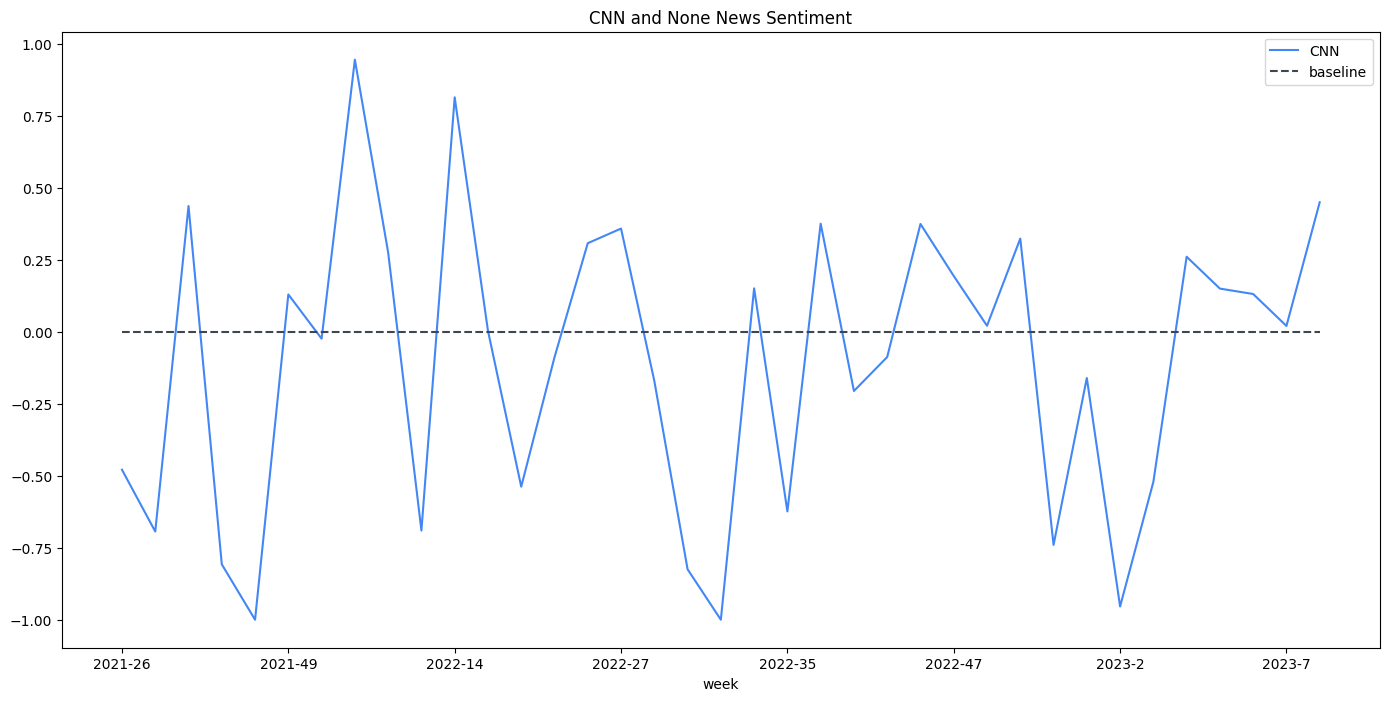

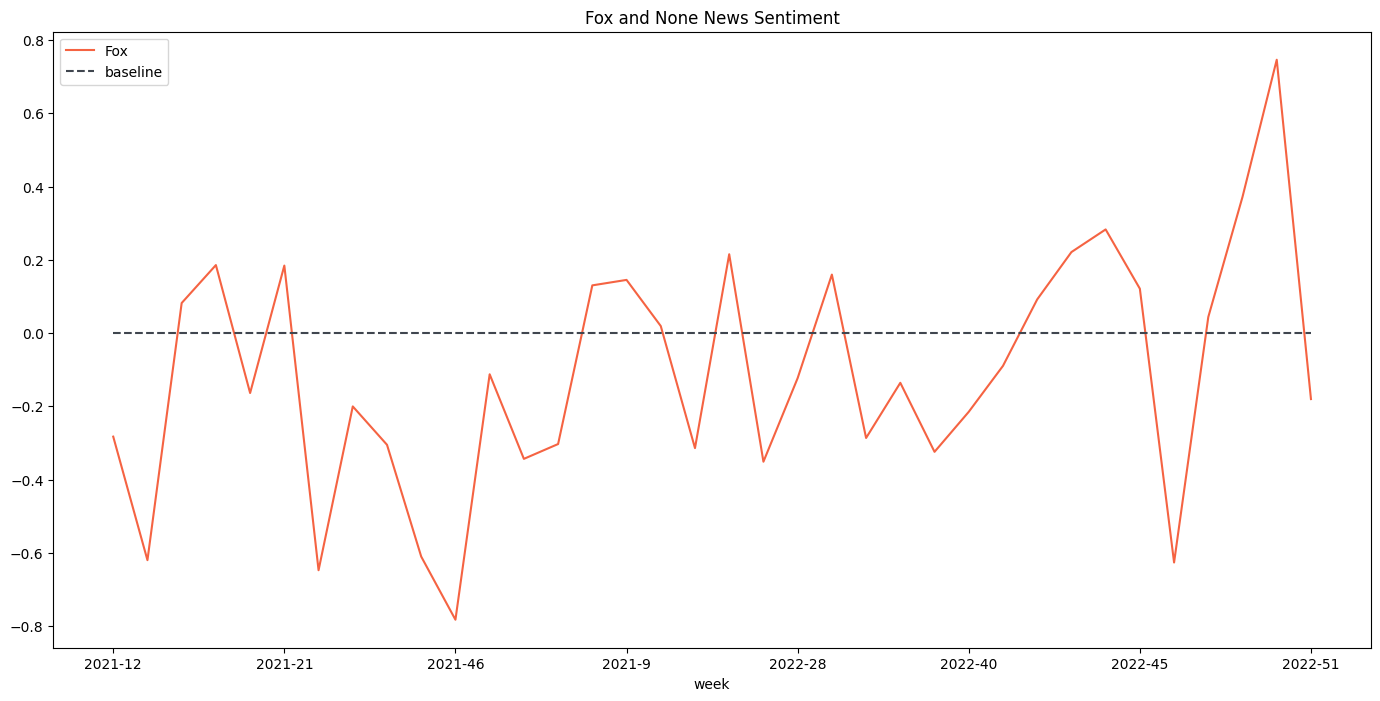

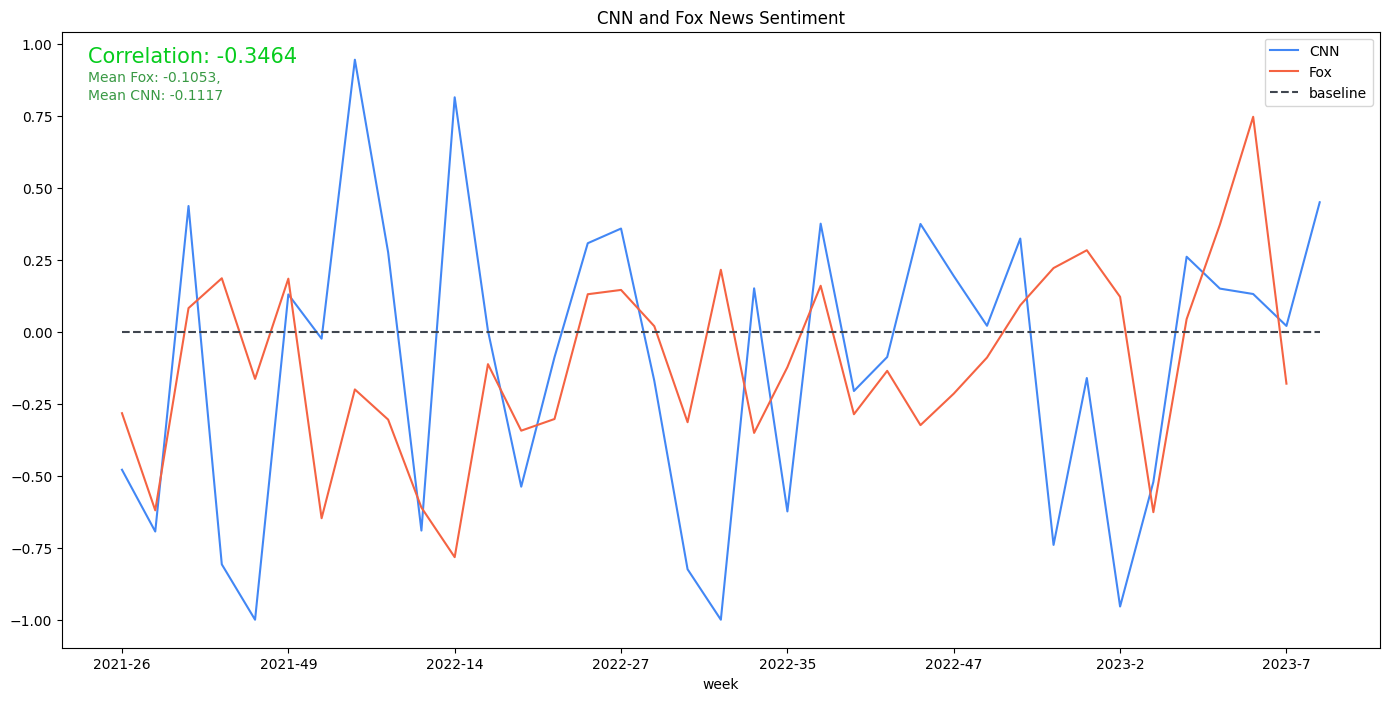

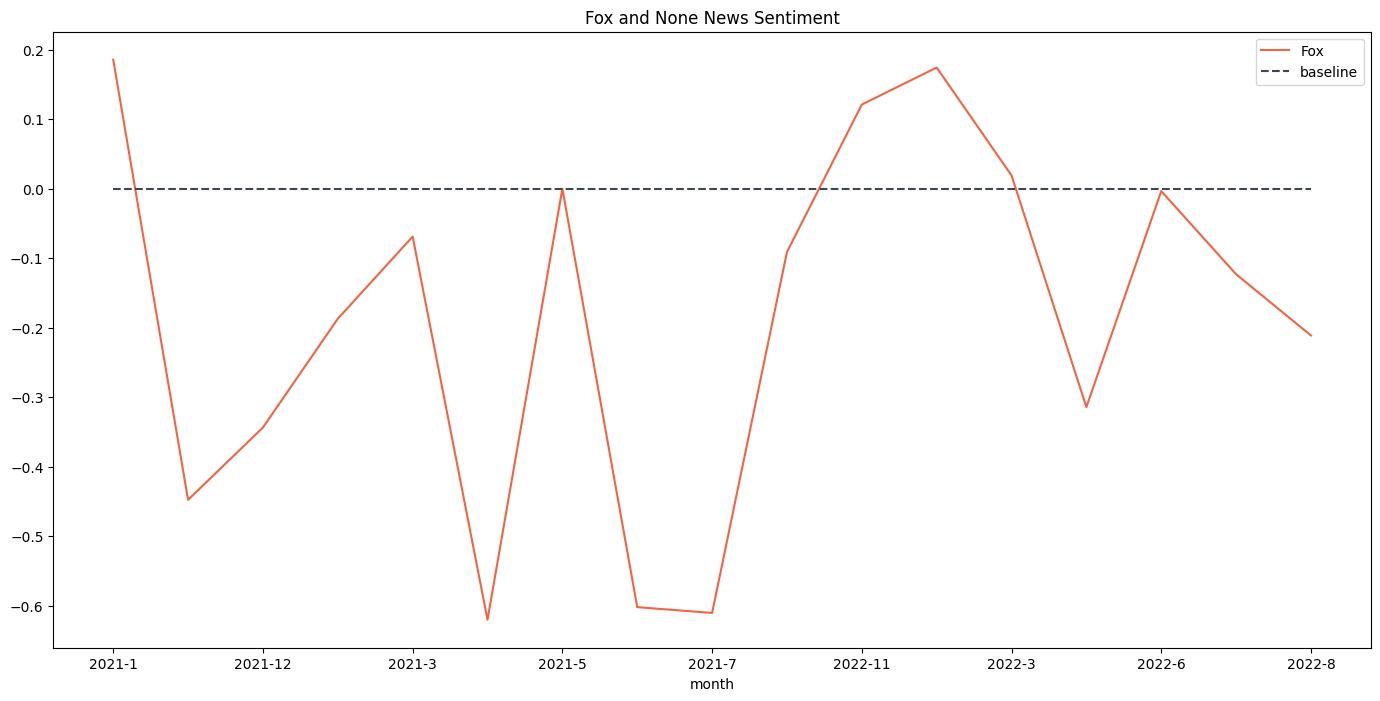

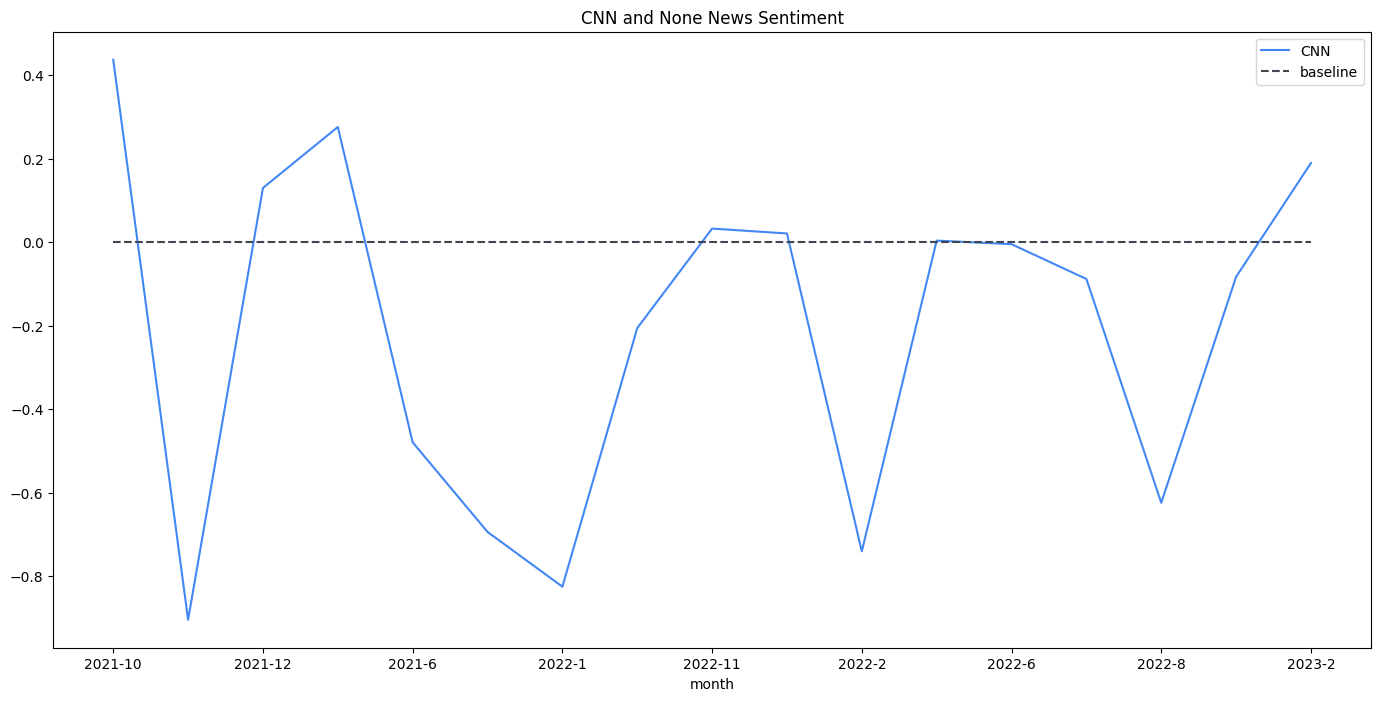

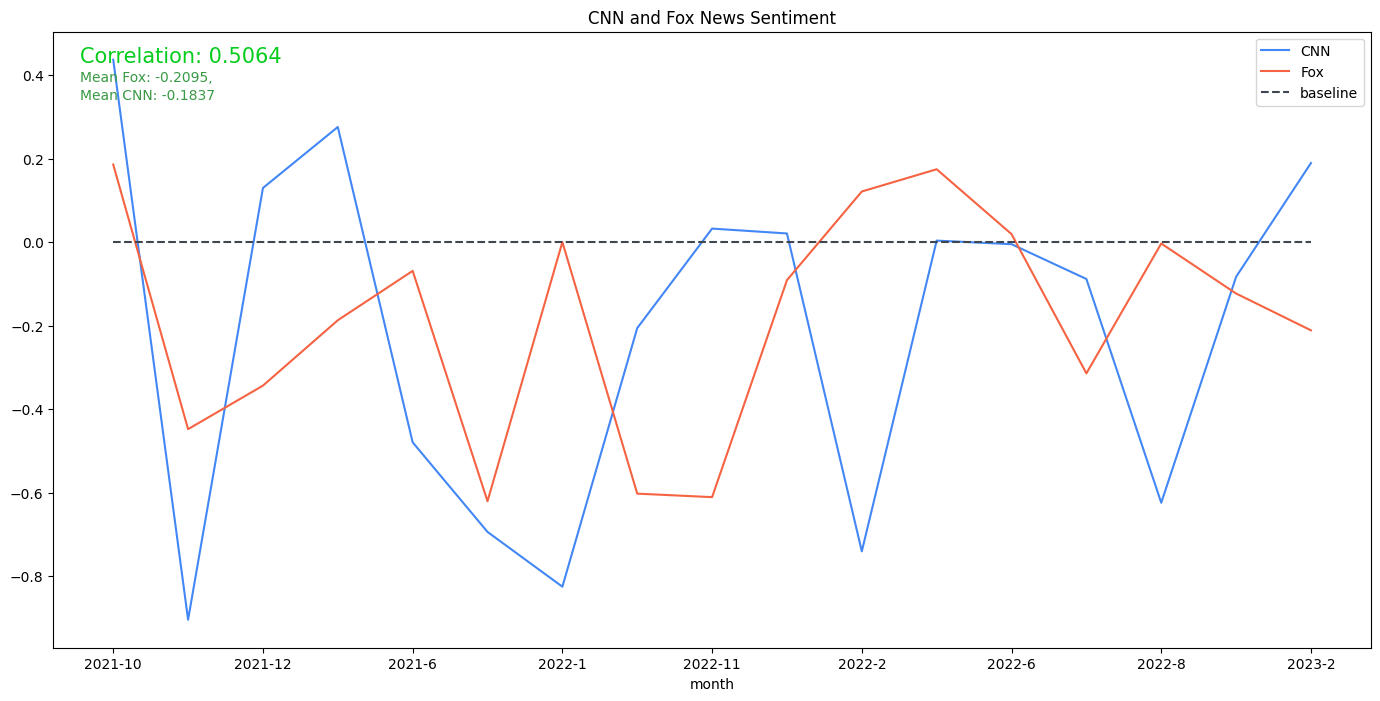

In [22]:
def monthly_avg_plot(df1:pd.DataFrame, vendor1, color='#4287f5', df2:pd.DataFrame = None, vendor2=None, color2='#f56342'):
            
            df1['date'] = pd.to_datetime(df1['date'])
            df1 = df1.sort_values(by=['month'], ascending=True)
            df1 = df1.groupby('month').median().rename(columns={'compound_s': vendor1})
            axes = df1.plot(y=vendor1, kind='line',
                             title=f'{vendor1} and {vendor2} News Sentiment', color=color , figsize=(17,8))
            if (df2 is not None):
                df2['date'] = pd.to_datetime(df2['date'])
                df2 = df2.sort_values(by=['month'], ascending=True)
                df2 = df2.groupby('month').median().rename(columns={'compound_s': vendor2})
                correlation = df2[vendor2].corr(df1[vendor1])
                mean1 = df1[vendor1].mean()
                mean2 = df2[vendor2].mean()

                df2.plot(y=vendor2, kind='line', ax=axes, color=color2)
                add_data_to_plot(axes, vendor1, vendor2, mean1, mean2, correlation)

            pd.DataFrame({'month': df1.index, 'baseline': [0.0]*len(df1)}).plot(
                    x='month', y='baseline', kind='line', ax=axes, color='#40464f', linestyle='--')

def weekly_avg_plot(df1:pd.DataFrame, vendor1, color='#4287f5', df2:pd.DataFrame = None, vendor2=None, color2='#f56342'):       
                df1['date'] = pd.to_datetime(df1['date'])
                df1 = df1.sort_values(by=['week'], ascending=True)
                df1 = df1.groupby('week').median().rename(columns={'compound_s': vendor1})
                axes = df1.plot(y=vendor1, kind='line', title=f'{vendor1} and {vendor2} News Sentiment', color=color , figsize=(17,8))

                if (df2 is not None):
                    df2['date'] = pd.to_datetime(df2['date'])
                    df2 = df2.sort_values(by=['week'], ascending=True)
                    df2 = df2.groupby('week').median().rename(columns={'compound_s': vendor2})
                    correlation = df2[vendor2].corr(df1[vendor1])
                    mean1 = df1[vendor1].mean()
                    mean2 = df2[vendor2].mean()
                    add_data_to_plot(axes, vendor1, vendor2, mean1, mean2, correlation)
    
                    df2.plot(y=vendor2, kind='line', ax=axes, color=color2)
                pd.DataFrame({'week': df1.index, 'baseline': [0.0]*len(df1)}).plot(x='week', y='baseline', kind='line', ax=axes, color='#40464f', linestyle='--')
    


weekly_avg_plot(cnn, 'CNN')
weekly_avg_plot(fox, 'Fox', color='#f56342')
weekly_avg_plot(cnn, 'CNN', df2=fox, vendor2='Fox', color2='#f56342')
monthly_avg_plot(fox, 'Fox', color='#f56342')
monthly_avg_plot(cnn, 'CNN')
monthly_avg_plot(cnn, 'CNN', df2=fox, vendor2='Fox', color2='#f56342')



## 3000 trump articles


/tmp/ipykernel_511/220903478.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = ((df['date'].dt.year.astype(int) - 2000) * 100)  + df['date'].dt.week.astype(int)
/tmp/ipykernel_511/220903478.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('week').median().plot(y='compound_s', kind='line', title=f'{vendor} News Sentiment', figsize=(17,8))
/tmp/ipykernel_511/220903478.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = ((df['date'].dt.year.astype(int) - 2000) * 100)  + df['date'].dt.week.astype(int)
/tmp/ipykernel_511/220903478.py:5: FutureWarning: The default value of numeric_only in DataFrame

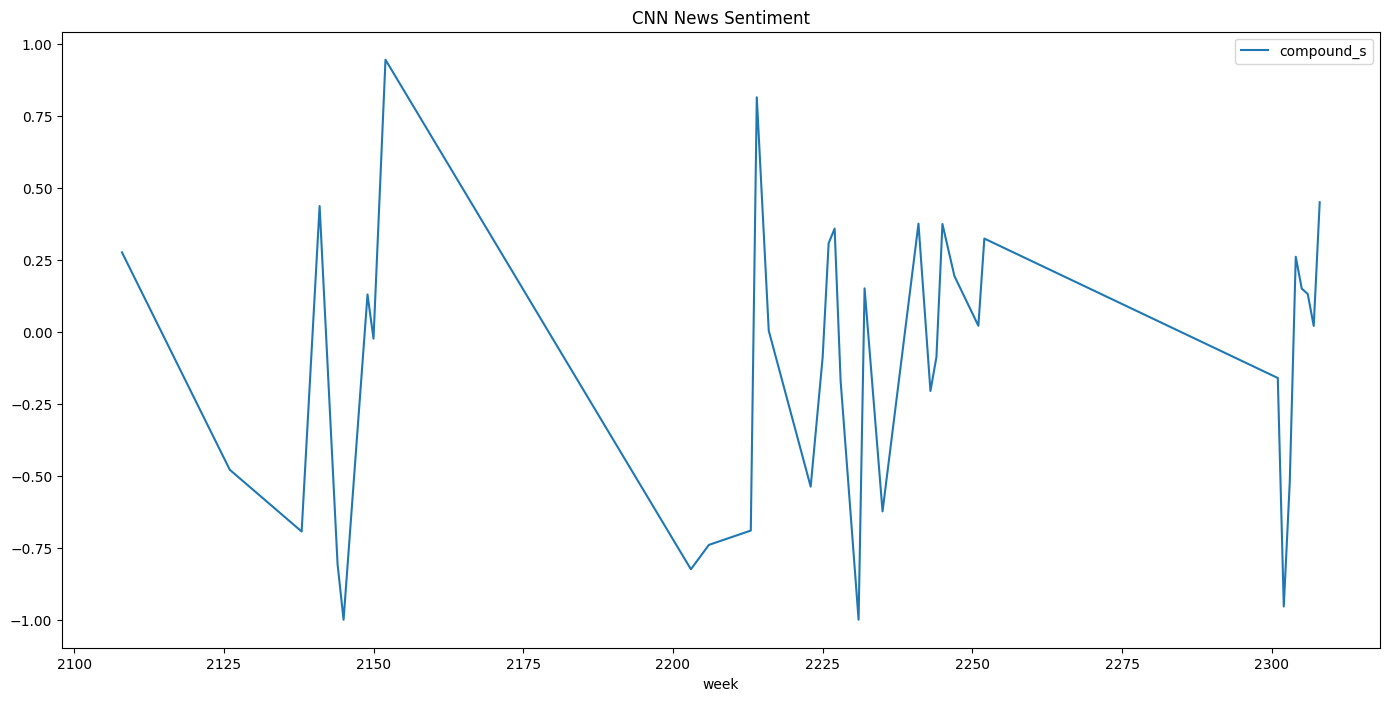

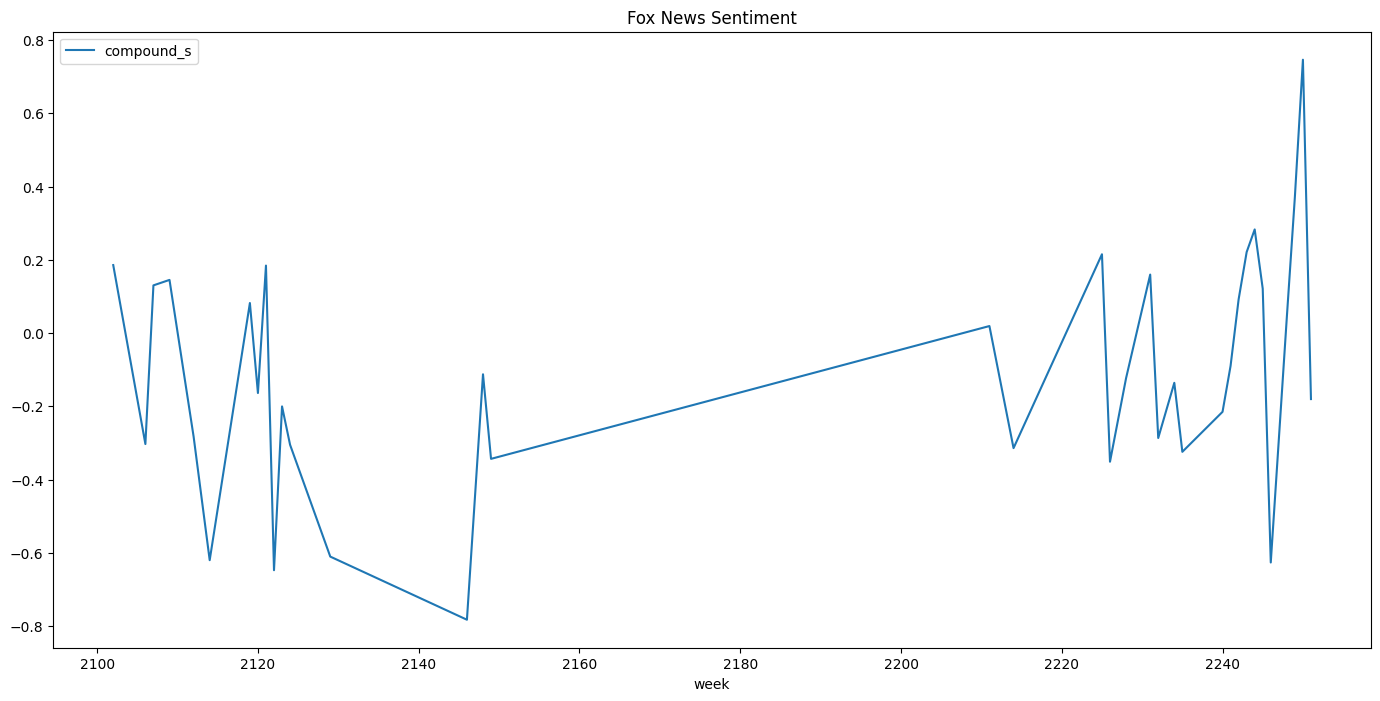

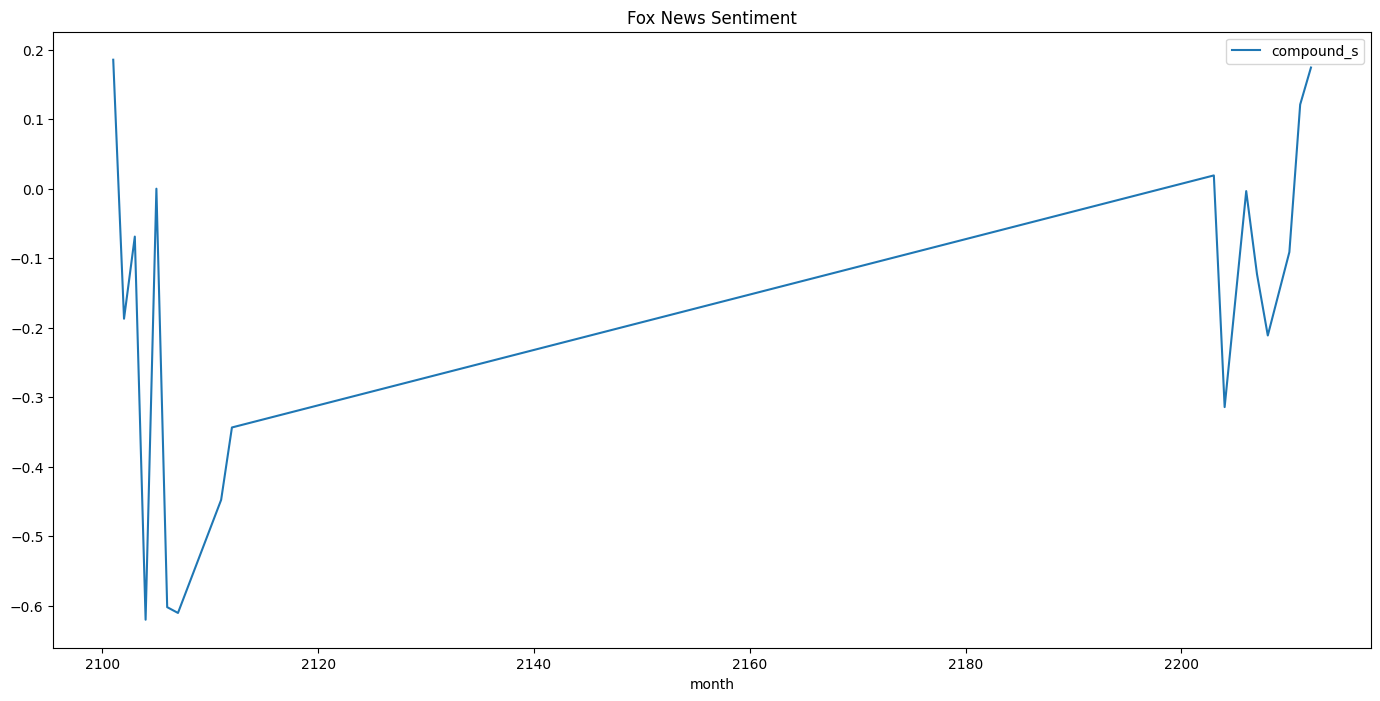

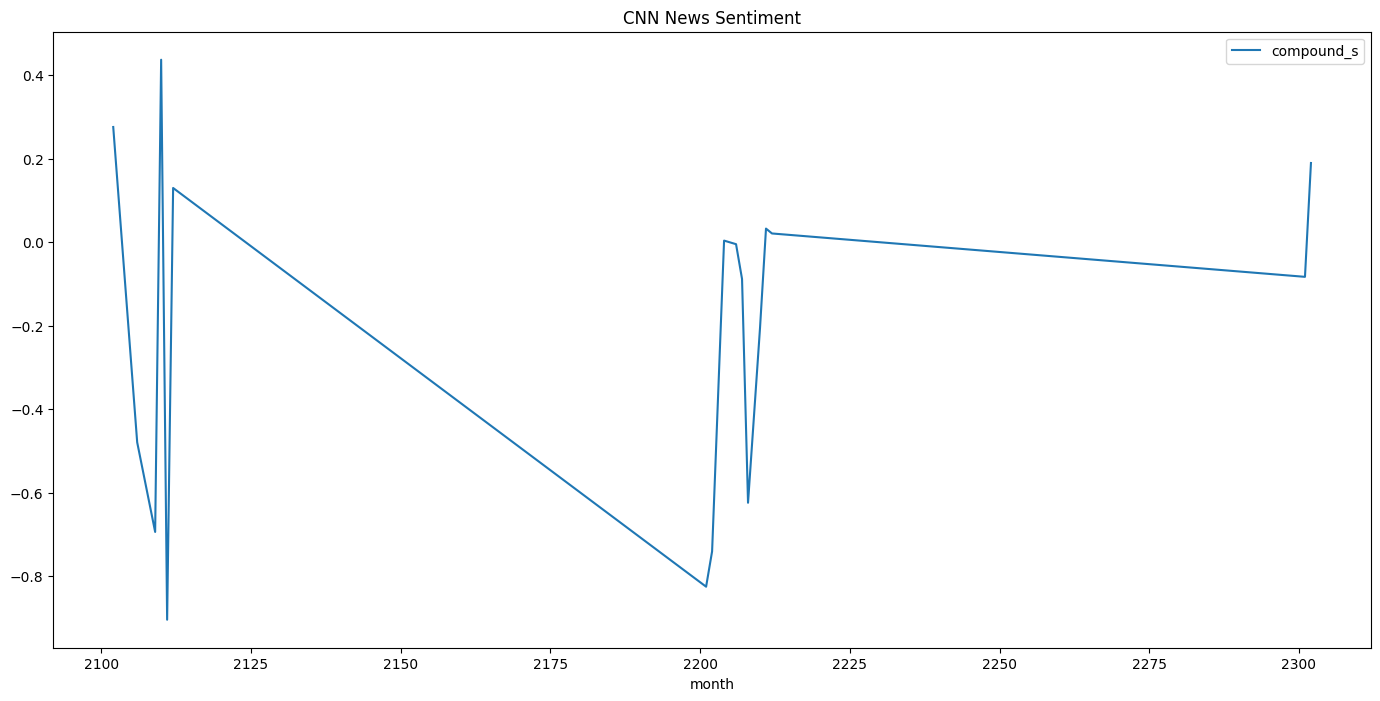

In [77]:
def weekly_avg_plot(df:pd.DataFrame, vendor):
    
    df['date'] = pd.to_datetime(df['date'])
    df['week'] = ((df['date'].dt.year.astype(int) - 2000) * 100)  + df['date'].dt.week.astype(int)
    df.groupby('week').median().plot(y='compound_s', kind='line', title=f'{vendor} News Sentiment', figsize=(17,8))

def monthly_avg_plot(df:pd.DataFrame, vendor):
        
        df['date'] = pd.to_datetime(df['date'])
        df['month'] =((df['date'].dt.year.astype(int) - 2000) * 100) + df['date'].dt.month.astype(int)
        
        df.groupby('month').median().plot(y='compound_s', kind='line', title=f'{vendor} News Sentiment', figsize=(17,8))

weekly_avg_plot(cnn, 'CNN')
weekly_avg_plot(fox, 'Fox')
monthly_avg_plot(fox, 'Fox')
monthly_avg_plot(cnn, 'CNN')

In [78]:
fox[cnn.month == '2021-12']

,title,date,index,text,num_of_sentences,neu_lbl,pos_lbl,neg_lbl,neg_s,neu_s,...,pos,neg,neu,compound,sum_score,rolling_score_sum,rolling_num_sentences,rolling_score_by_senteces,week,month
